In [1]:
'''-------------------- Dependencies --------------------'''
# region Imports
# Import Dependencies
import datetime
import random
import time
import math
import warnings
from catboost import CatBoostClassifier, Pool, cv
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.model_selection import train_test_split
import catboost
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
%matplotlib inline

font = {'family': 'normal',
        'weight': 'bold',
        'size': 22}
matplotlib.rc('font', **font)
sns.set(style="ticks", context="talk")
plt.style.use('seaborn-whitegrid')
# plt.style.use("dark_background")


# Let's be rebels and ignore warnings for now
warnings.filterwarnings('ignore')  # %%


print('imports successful')

# endregion Imports



imports successful


In [2]:

# %%
'''-------------------- Dependencies --------------------'''
# region Imports
# Import Dependencies
import datetime
import random
import time
import math
import warnings
from catboost import CatBoostClassifier, Pool, cv
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.model_selection import train_test_split
import catboost
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
%matplotlib inline

font = {
        'family': 'normal',
        'weight': 'bold',
        'size': 22
        }
matplotlib.rc('font', **font)
sns.set(style="ticks", context="talk")
plt.style.use('seaborn-whitegrid')
# plt.style.use("dark_background")


# Let's be rebels and ignore warnings for now
warnings.filterwarnings('ignore')  # %%


print('imports successful')

# endregion Imports



imports successful


In [3]:
'''-------------------- Data --------------------'''
# region Read Data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
gender_submission = pd.read_csv('data/gender_submission.csv')
print('data loaded successfully')
# endregion Read Data


data loaded successfully


In [4]:
'''-------------------- Describe --------------------'''
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Missing Values Per Column
          column  missing_entries perc_missing
0   PassengerId                0        0.00%
1      Survived                0        0.00%
2        Pclass                0        0.00%
3          Name                0        0.00%
4           Sex                0        0.00%
5           Age              177       19.87%
6         SibSp                0        0.00%
7         Parch                0        0.00%
8        Ticket                0        0.00%
9          Fare                0        0.00%
10        Cabin              687       77.10%
11     Embarked                2        0.22%


<AxesSubplot:>

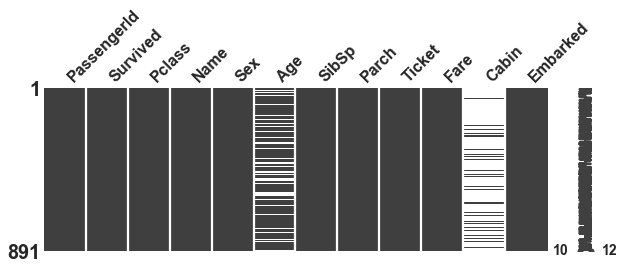

In [5]:
'''-------------------- Missing Data --------------------'''
# region Missing_data_df


def find_missing_vals(df):
    missing_df = pd.DataFrame()
    for col in df.columns:
        total_value_count = df[col].value_counts().sum()
        missing = len(df) - total_value_count
        perc_missing = '{:.2f}%'.format(missing*100 / len(df))
        row = pd.DataFrame({
            'column': [col],
            'missing_entries': [missing],
            'perc_missing': [perc_missing],
        })
        missing_df = missing_df.append(row, sort=False)

    return missing_df.reset_index(drop=True)


def print_missing_count(var_name):
    amount_missing = missing_df.loc[missing_df.column ==
                                    var_name, 'missing_entries'].values[0]
    perc_missing = missing_df.loc[missing_df.column ==
                                  var_name, 'perc_missing'].values[0]
    print(
        f'Amount of "{var_name}" Data Missing: {amount_missing} ({perc_missing})')


missing_df = find_missing_vals(train)
print('missing values per column\n'.title(), missing_df)
matrix_view = missingno.matrix(train, figsize=(10, 3))
matrix_view
# endregion Missing_data_df


In [6]:
# region Handling Data
# Binned
df_bin = pd.DataFrame()
# Continuous
df_con = pd.DataFrame()
# endregion Handling Data

0    549
1    342
Name: Survived, dtype: int64


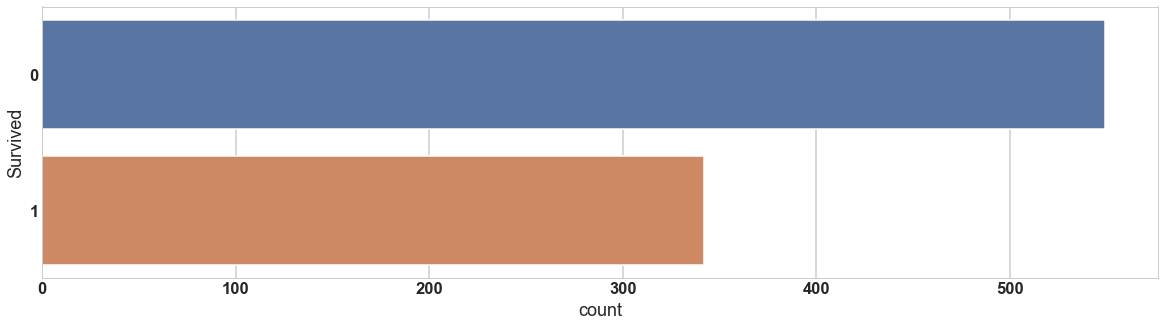

In [7]:
'''-------------------- Survived Vs. Perished --------------------'''
# region Survived
variable = 'Survived'
df_bin['Survived'] = train.Survived
df_con['Survived'] = train.Survived
fig = plt.figure(figsize=(20, 5))
sns.countplot(y="Survived", data=train)
print(train.Survived.value_counts())
# endregion Survived



Amount of "Pclass" Data Missing: 0 (0.00%)


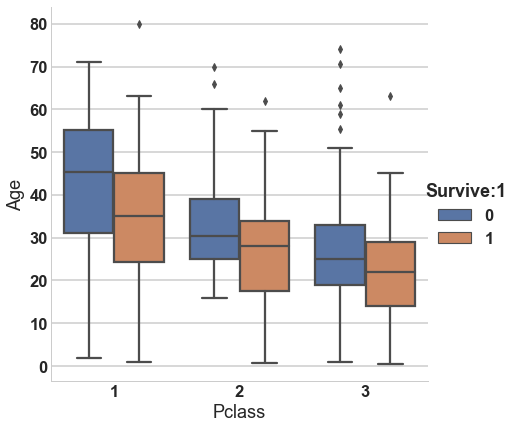

In [39]:
'''-------------------- Ticket Class (Pclass) --------------------'''
# region Pclass
variable = 'Pclass'
df_bin[variable] = train[variable]
df_con[variable] = train[variable]
print_missing_count(variable)
#sns.distplot(train.Pclass)

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=train, 
    kind="box",
    x=variable,
    y="Age", 
    hue="Survived",
    ci="sd", 
    #palette="dark", 
    #alpha=.6, 
    height=6
)
#g.despine(left=True)
g.set_axis_labels(variable, "Age")
g.legend.set_title("Survive:1")



In [9]:
'''-------------------- Passenger Name --------------------'''
# region Name Field
variable = 'Name'
# df_bin[variable] = train[variable]
# df_con[variable] = train[variable]
print_missing_count(variable)
unique_names = train[variable].unique().tolist()
no_repeats = bool(len(unique_names) == len(train))
msg = f'No Repeat Names: {no_repeats}'
print(msg)
# endregion Name Field



Amount of "Name" Data Missing: 0 (0.00%)
No Repeat Names: True


Amount of "Sex" Data Missing: 0 (0.00%)
male      577
female    314
Name: Sex, dtype: int64


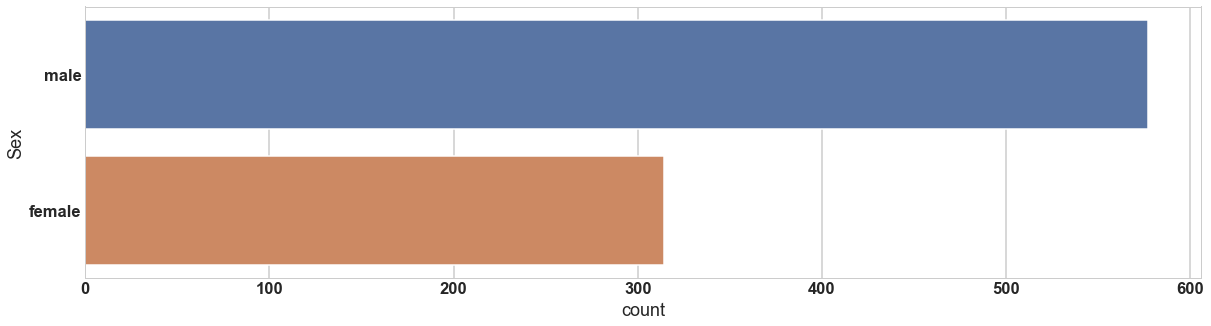

In [10]:

'''-------------------- Passenger Sex --------------------'''
# region Sex
variable = 'Sex'
df_bin[variable] = np.where(train[variable] == 'female', 1, 0)

df_con[variable] = train[variable]
print_missing_count(variable)
fig = plt.figure(figsize=(20, 5))
sns.countplot(y=variable, data=train)
print(train[variable].value_counts())
# endregion Sex



In [42]:
'''-------------------- Survived vs. Sex --------------------'''

# region Surv vs Sex
fem_df = df_bin[df_bin['Sex'] == 1]
fem_total = len(fem_df)
fem_survived = len(fem_df[fem_df['Survived'] == 1])
perc_fem_surv = '{:.2f}%'.format(fem_survived*100 / fem_total)
men_df = df_bin[df_bin['Sex'] == 0]
men_total = len(men_df)
men_survived = len(men_df[men_df['Survived'] == 1])
perc_men_surv = '{:.2f}%'.format(men_survived*100 / men_total)

print(
    f'# of Female Survivors : {fem_survived} / {fem_total} ({perc_fem_surv}) \n'
    f'# of Male Survivors : {men_survived} / {men_total} ({perc_men_surv}) \n'
)
fig = plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]
             ['Sex'], kde_kws={'label': 'Survived'})
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'],
             kde_kws={'label': 'Did not Survive'})
# endregion Surv vs Sex


# of Female Survivors : 231 / 312 (74.04%) 
# of Male Survivors : 109 / 577 (18.89%) 



TypeError: Vertical orientation requires numeric `y` variable.

In [12]:
'''-------------------- Age --------------------'''
variable = 'Age'
print_missing_count(variable)


Amount of "Age" Data Missing: 177 (19.87%)


In [13]:
'''-------------------- Subplotter Func --------------------'''


def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df)
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column],
                     kde_kws={"label": "Survived"})
        sns.distplot(data.loc[data[label_column] == 0][target_column],
                     kde_kws={"label": "Did not survive"})
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data)
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column],
                     kde_kws={"label": "Survived"})
        sns.distplot(data.loc[data[label_column] == 0][target_column],
                     kde_kws={"label": "Did not survive"})



Amount of "SibSp" Data Missing: 0 (0.00%)
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


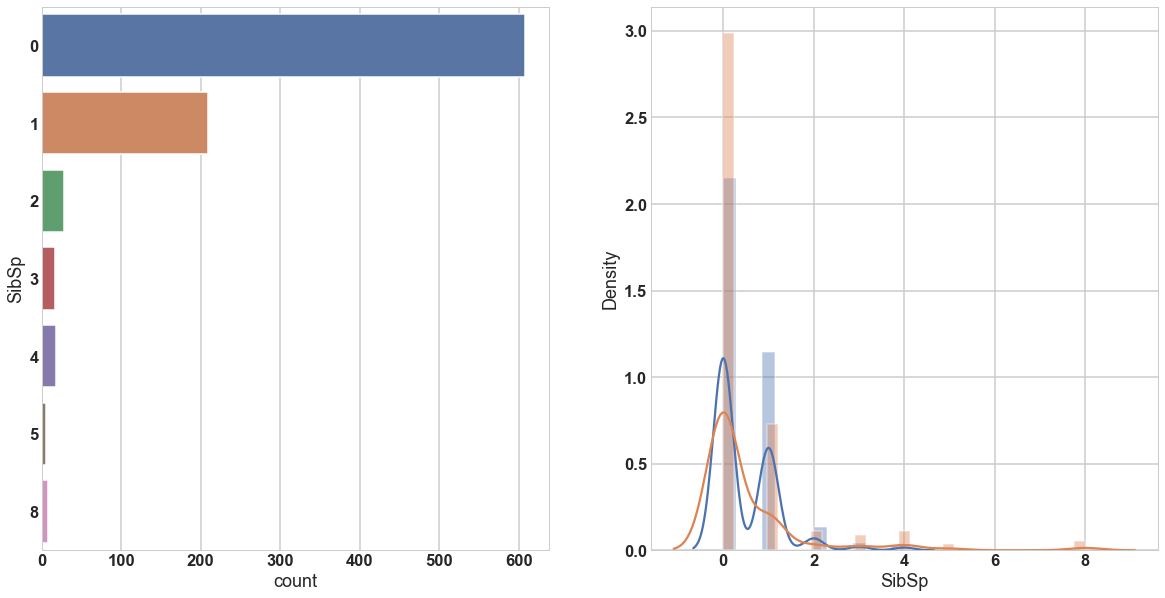

In [14]:
'''-------------------- Sibling / Spouse --------------------'''
# region SibSp
variable = 'SibSp'
df_bin[variable] = train[variable]
df_con[variable] = train[variable]
print_missing_count(variable)
print(train[variable].value_counts())
plot_count_dist(
    data=train,
    bin_df=df_bin,
    label_column='Survived',
    target_column=variable,
    figsize=(20, 10)
)
# endregion SibSp


Amount of "Parch" Data Missing: 0 (0.00%)
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


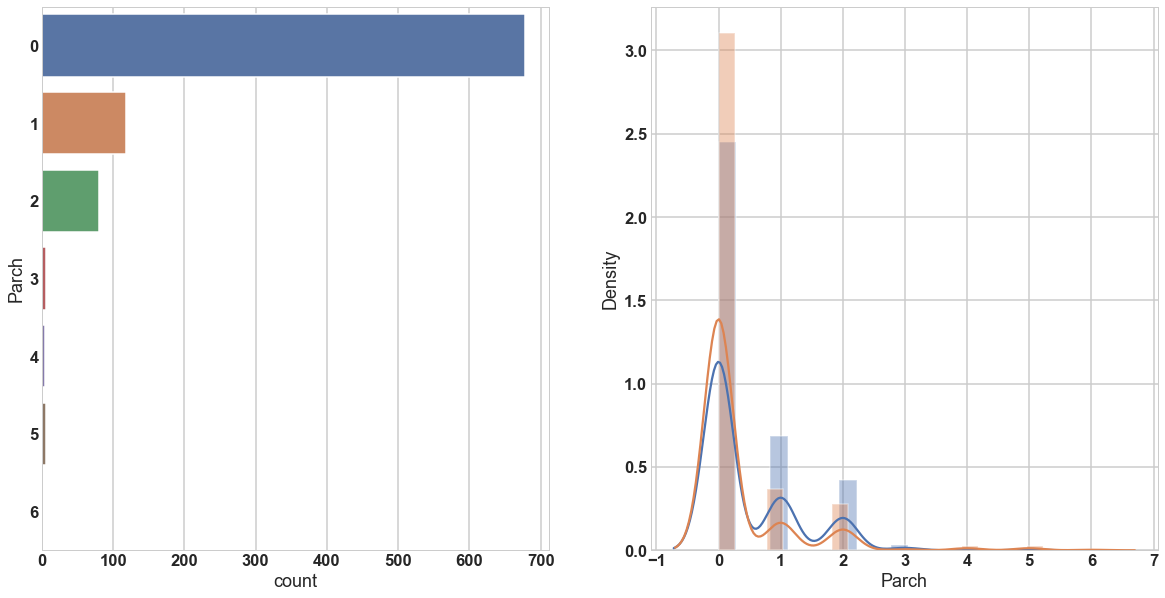

In [15]:
'''-------------------- Parents/Children --------------------'''
# Specifically, the number of parents/children the passenger has on board

# region Parent/Child
variable = 'Parch'
df_bin[variable] = train[variable]
df_con[variable] = train[variable]
print_missing_count(variable)
print(train[variable].value_counts())
plot_count_dist(
    data=train,
    bin_df=df_bin,
    label_column='Survived',
    target_column=variable,
    figsize=(20, 10)
)
# endregion Parent/Child



In [16]:

'''-------------------- Ticket Text --------------------'''
# region Ticket
variable = 'Ticket'
print_missing_count(variable)
unique_tickets = len(train[variable].unique())
print(f'\nnum of unique tickets: {unique_tickets}\n'.title())

val_count = train[variable].value_counts()
u_val_count = val_count.unique()
for count in u_val_count:
    print(
        f'{len(val_count[val_count == count])} tickets values used {count} times')
# endregion Ticket



Amount of "Ticket" Data Missing: 0 (0.00%)

Num Of Unique Tickets: 681

3 tickets values used 7 times
3 tickets values used 6 times
2 tickets values used 5 times
11 tickets values used 4 times
21 tickets values used 3 times
94 tickets values used 2 times
547 tickets values used 1 times


Amount of "Fare" Data Missing: 0 (0.00%)
Num of Unique Fare Costs: 248

distribution:



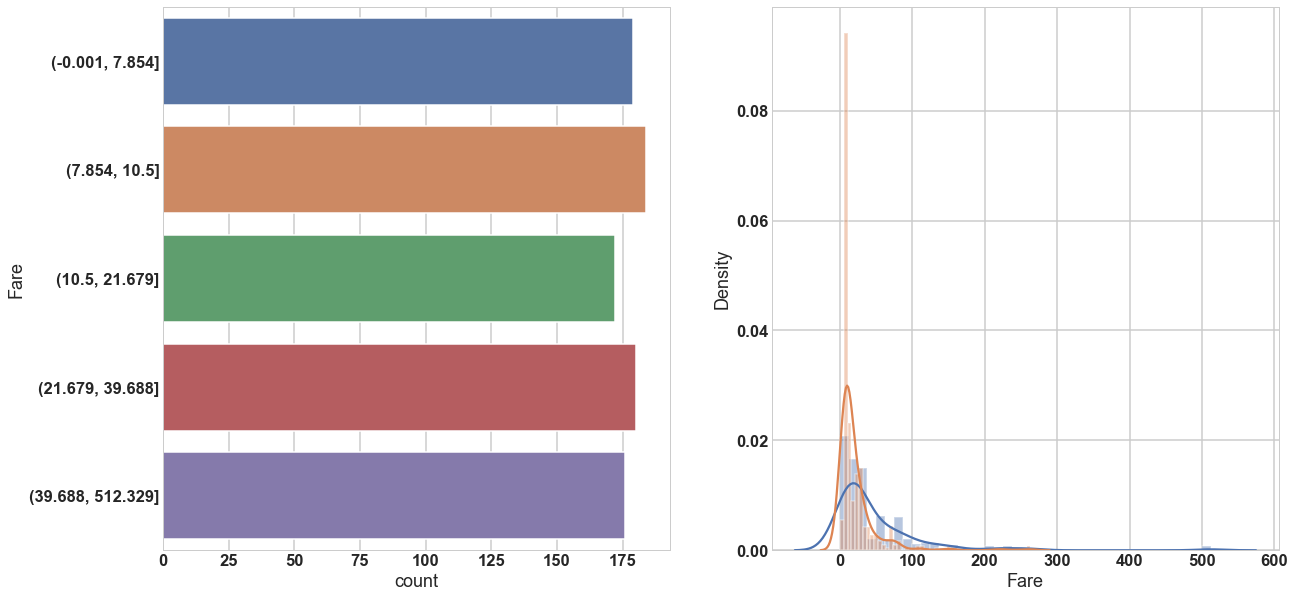

In [17]:
'''-------------------- Fare --------------------'''

# region Fare
variable = 'Fare'
# Bin to Quintiles
df_bin[variable] = pd.qcut(train[variable], q=5)  # Discretised
df_con[variable] = train[variable]
print_missing_count(variable)
print(
    f'Num of Unique Fare Costs: {len(train[variable].unique())}'
)
print('\ndistribution:\n')
df_bin[variable].value_counts()


plot_count_dist(
    data=train,
    bin_df=df_bin,
    label_column='Survived',
    target_column=variable,
    figsize=(20, 10),
    use_bin_df=True,
)

# endregion Fare


In [18]:
'''-------------------- Cabin --------------------'''

# region Cabin
variable = 'Cabin'
print_missing_count(variable)
total = len(train[variable].dropna())
unique = len(train[variable].unique())
print(
    f'{unique}  unique values out of {total} \n'
    'Too many missing to be useful'
)
# endregion Cabin


Amount of "Cabin" Data Missing: 687 (77.10%)
148  unique values out of 204 
Too many missing to be useful


Amount of "Embarked" Data Missing: 2 (0.22%)

 
3  unique values out of 889 

 breakdown:
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


<AxesSubplot:xlabel='Embarked', ylabel='count'>

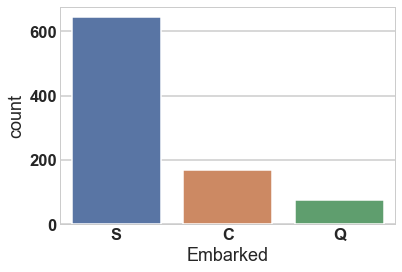

In [19]:
'''-------------------- Embarked --------------------'''
# region Embarked
variable = 'Embarked'
df_bin[variable] = train[variable]
df_con[variable] = train[variable]
# Clean NaN
df_bin = df_bin.dropna(subset=[variable])
df_con = df_con.dropna(subset=[variable])
print_missing_count(variable)
total = len(train[variable].dropna())
unique = len(train[variable].dropna().unique())
print(
    '\n',
    f'\n{unique}  unique values out of {total} \n'
    '\n',
    f'breakdown:\n {train[variable].value_counts()}',
)
sns.countplot(x=variable, data=train)
# endregion Embarked



In [20]:
'''-------------------- Subset Compare and Create --------------------'''
# region Compare Subset
print('columns not included in subset frame:'.title())
for col in train.columns:
    if col not in df_bin.columns:
        print(f'>>> {col}')

one_hot_cols = ['Embarked', 'Sex', 'Pclass']

concats = [df_con]
for col in one_hot_cols:
    ohdf = pd.get_dummies(df_con[col],
                          prefix=col.lower())
    concats.append(ohdf)

df_con_enc = pd.concat(concats, axis=1)
df_con_enc = df_con_enc.drop(one_hot_cols, axis=1)
print('\nDummified Data:')
# df_con_enc.head(10)
X_train = df_con_enc.drop('Survived', axis=1)
y_train = df_con_enc['Survived']
print(
    'X_train set has:\n',
    '{} rows, {} columns'.format(*X_train.shape)
)
X_train.head(5)
# endregion Compare Subset



Columns Not Included In Subset Frame:
>>> PassengerId
>>> Name
>>> Age
>>> Ticket
>>> Cabin

Dummified Data:
X_train set has:
 889 rows, 11 columns


,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [21]:

'''-------------------- Algo Func --------------------'''

# Function that runs the requested algorithm and returns the accuracy metrics


def fit_ml_algos(algos, X_train, y_train, cv):

    algo_df = pd.DataFrame()
    for algo in algos.keys():
        algo_name = algo
        algo = algos[algo]()

        start_time = time.time()
        # One Pass
        model = algo.fit(X_train, y_train)
        acc = round(model.score(X_train, y_train) * 100, 2)

        # Cross Validation
        train_pred = model_selection.cross_val_predict(algo,
                                                    X_train,
                                                    y_train,
                                                    cv=cv,
                                                    n_jobs=-1)
        # Cross-validation accuracy metric
        acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)

        log_time = (time.time() - start_time)
        elapsed = datetime.timedelta(seconds=log_time)
        row = pd.DataFrame(
            {
                'Algo': algo_name,
                'Accuracy': acc,
                'Accuracy_CV_10-F': acc_cv,
                'Time_Elapsed':elapsed
            },
        index=[0]
        )
        algo_df = algo_df.append(row, sort=False)

    return algo_df.set_index('Algo', drop=True)




In [22]:
'''-------------------- SkitLearn Algos --------------------'''
# region SkitLearn Algos
algos = {
    'LogisticRegression':LogisticRegression,
    'KNeighborsClassifier':KNeighborsClassifier,
    'GaussianNB':GaussianNB,
    'LinearSVC':LinearSVC,
    'SGDClassifier':SGDClassifier,
    'DecisionTreeClassifier':DecisionTreeClassifier,
    'GradientBoostingClassifier':GradientBoostingClassifier,
}
algos_df = fit_ml_algos(algos, X_train, y_train, 10)
algos_df
# endregion SkitLearn Algos


,Accuracy,Accuracy_CV_10-F,Time_Elapsed
Algo,,,
LogisticRegression,79.98,79.42,0 days 00:00:02.388709
KNeighborsClassifier,83.46,76.72,0 days 00:00:00.137555
GaussianNB,78.52,77.95,0 days 00:00:00.041623
LinearSVC,78.18,74.24,0 days 00:00:00.170612
SGDClassifier,64.68,68.39,0 days 00:00:00.058089
DecisionTreeClassifier,92.46,80.09,0 days 00:00:00.066910
GradientBoostingClassifier,86.61,80.65,0 days 00:00:00.459334


In [23]:
'''-------------------- Catboost --------------------'''
# Catboost
# Categorical Features cannot be floats
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

train_pool = Pool(X_train, y_train, cat_features)

catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,silent=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)
acc_catboost

83.91

In [24]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

:	learn: 0.2495603	test: 0.4345274	best: 0.4320750 (502)	total: 40.6s	remaining: 11.6s
778:	learn: 0.2494926	test: 0.4345579	best: 0.4320750 (502)	total: 40.7s	remaining: 11.5s
779:	learn: 0.2493571	test: 0.4344664	best: 0.4320750 (502)	total: 40.8s	remaining: 11.5s
780:	learn: 0.2492394	test: 0.4344553	best: 0.4320750 (502)	total: 40.8s	remaining: 11.4s
781:	learn: 0.2490710	test: 0.4344387	best: 0.4320750 (502)	total: 40.9s	remaining: 11.4s
782:	learn: 0.2489407	test: 0.4342858	best: 0.4320750 (502)	total: 40.9s	remaining: 11.3s
783:	learn: 0.2487804	test: 0.4342485	best: 0.4320750 (502)	total: 41s	remaining: 11.3s
784:	learn: 0.2486552	test: 0.4342945	best: 0.4320750 (502)	total: 41s	remaining: 11.2s
785:	learn: 0.2485666	test: 0.4342381	best: 0.4320750 (502)	total: 41.1s	remaining: 11.2s
786:	learn: 0.2484601	test: 0.4342937	best: 0.4320750 (502)	total: 41.1s	remaining: 11.1s
787:	learn: 0.2483762	test: 0.4343312	best: 0.4320750 (502)	total: 41.2s	remaining: 11.1s
788:	learn: 0.248

In [25]:
# Print out the CatBoost model metrics
row = pd.DataFrame(
{
    'Accuracy': acc_catboost,
    'Accuracy_CV_10-F': acc_cv_catboost,
    'Time_Elapsed':datetime.timedelta(seconds=catboost_time)
},
index=['CatBoost']
)
algos_df = algos_df.append(row, sort=False)
algos_df

,Accuracy,Accuracy_CV_10-F,Time_Elapsed
LogisticRegression,79.98,79.42,0 days 00:00:02.388709
KNeighborsClassifier,83.46,76.72,0 days 00:00:00.137555
GaussianNB,78.52,77.95,0 days 00:00:00.041623
LinearSVC,78.18,74.24,0 days 00:00:00.170612
SGDClassifier,64.68,68.39,0 days 00:00:00.058089
DecisionTreeClassifier,92.46,80.09,0 days 00:00:00.066910
GradientBoostingClassifier,86.61,80.65,0 days 00:00:00.459334
CatBoost,83.91,81.32,0 days 00:00:53.547101


In [27]:
algos_df.sort_values(by='Accuracy_CV_10-F', ascending=False)

,Accuracy,Accuracy_CV_10-F,Time_Elapsed
CatBoost,83.91,81.32,0 days 00:00:53.547101
GradientBoostingClassifier,86.61,80.65,0 days 00:00:00.459334
DecisionTreeClassifier,92.46,80.09,0 days 00:00:00.066910
LogisticRegression,79.98,79.42,0 days 00:00:02.388709
GaussianNB,78.52,77.95,0 days 00:00:00.041623
KNeighborsClassifier,83.46,76.72,0 days 00:00:00.137555
LinearSVC,78.18,74.24,0 days 00:00:00.170612
SGDClassifier,64.68,68.39,0 days 00:00:00.058089
